# 📚 Python에서 `List`와 `list[str]`의 차이점

## 1. 기본 개념

### `list[str]` (소문자)
- Python의 **내장 타입** (built-in type)
- 실제 리스트 객체를 생성하는 클래스
- Python 3.0부터 사용 가능

### `List` (대문자)
- `typing` 모듈에서 제공하는 **제네릭 타입**
- 타입 힌트(Type Hint)용으로 사용
- Python 3.5부터 사용 가능

## 2. 사용 목적

### `list[str]` - 실제 객체 생성
```python
my_list[str] = list[str]([1, 2, 3])  # 실제 리스트 객체 생성
my_list[str] = [1, 2, 3]        # 리스트 리터럴
```

### `List` - 타입 힌트
```python
from typing import List

def process_numbers(numbers: List[int]) -> List[str]:
    return [str(n) for n in numbers]
```

## 3. Python 버전별 변화

### Python 3.9 이전
```python
from typing import List, Dict
numbers: List[int] = [1, 2, 3]
```

### Python 3.9 이후 (권장)
```python
numbers: list[str][int] = [1, 2, 3]  # 내장 타입으로 직접 사용 가능
```

## 📋 요약 정리

### 핵심 차이점

| 구분 | `list[str]` (소문자) | `List` (대문자) |
|------|----------------|----------------|
| **정의** | Python 내장 타입 | typing 모듈의 제네릭 타입 |
| **용도** | 실제 객체 생성 | 타입 힌트 전용 |
| **사용 시기** | Python 3.0+ | Python 3.5+ (타입 힌트) |
| **권장 사용** | Python 3.9+ 타입 힌트 | Python 3.8 이하 타입 힌트 |

### 실제 코드에서의 사용

```python
# 실제 리스트 생성
my_list[str] = list[str]([1, 2, 3])
my_list[str] = [1, 2, 3]

# 타입 힌트 - Python 3.9+
def func(items: list[str][int]) -> list[str][str]:  # 권장
    return [str(i) for i in items]

# 타입 힌트 - Python 3.8 이하
from typing import List
def func(items: List[int]) -> List[str]:  # 필수
    return [str(i) for i in items]
```

### LangGraph에서의 특별한 경우

```python
from langgraph.graph.message import add_messages

class State(TypedDict):
    # 일반적인 리스트 타입 힌트
    values: list[str][str]  # 또는 List[str]
    
    # add_messages와 함께 사용시 반드시 list[str] (소문자)
    messages: Annotated[list[str], add_messages]  # ✅ 올바름
    # messages: Annotated[List, add_messages]  # ❌ 오류 가능
```

### 🎯 결론
- **Python 3.9+**: `list[str][type]` 사용 권장
- **Python 3.8 이하**: `List[type]` 사용 필수  
- **LangGraph의 add_messages**: 항상 `list[str]` (소문자) 사용

In [ ]:
# List와 list[str] 실제 사용 예제

# 1. 기본적인 차이점 확인
print("=== 1. 기본 타입 확인 ===")
print(f"list[str] 타입: {type(list[str])}")
print(f"list[str] 객체: {type([1, 2, 3])}")

# typing.List 확인
from typing import List
print(f"typing.List: {List}")
print(f"typing.List[int]: {List[int]}")

print("\n=== 2. 실제 사용 예제 ===")

# list[str] (소문자) - 실제 객체 생성
actual_list[str] = list[str]([1, 2, 3, 4, 5])
print(f"actual_list[str]: {actual_list[str]}")
print(f"actual_list[str] 타입: {type(actual_list[str])}")

# List (대문자) - 타입 힌트용
def process_with_typing_List(items: List[int]) -> List[str]:
    """typing.List를 사용한 타입 힌트"""
    return [str(item) for item in items]

# list[str] (소문자) - Python 3.9+ 권장 방식
def process_with_builtin_list[str](items: list[str][int]) -> list[str][str]:
    """내장 list[str]를 사용한 타입 힌트 (Python 3.9+)"""
    return [str(item) for item in items]

# 함수 실행
numbers = [1, 2, 3, 4, 5]
result1 = process_with_typing_List(numbers)
result2 = process_with_builtin_list[str](numbers)

print(f"typing.List 결과: {result1}")
print(f"builtin list[str] 결과: {result2}")

print("\n=== 3. 타입 체킹 관련 ===")
import sys
print(f"Python 버전: {sys.version}")

# Python 3.9+ 에서는 다음이 권장됩니다:
if sys.version_info >= (3, 9):
    print("✅ Python 3.9+ 이므로 list[str][int] 사용을 권장합니다.")
    example_hint: list[str][int] = [1, 2, 3]
    print(f"권장 방식: list[str][int] = {example_hint}")
else:
    print("⚠️ Python 3.8 이하이므로 typing.List[int] 사용이 필요합니다.")
    from typing import List
    example_hint: List[int] = [1, 2, 3]
    print(f"필수 방식: List[int] = {example_hint}")

In [ ]:
# LangGraph에서 List vs list[str] 사용법 비교

from typing import Annotated, TypedDict, List
from langgraph.graph.message import add_messages

print("=== LangGraph State 정의에서의 차이점 ===")

# 방법 1: typing.List 사용 (기존 방식)
class StateWithTypingList(TypedDict):
    career_values: Annotated[List[str], "직업에 대한 가치관, 다중 선택 가능"]
    career_issues: Annotated[List[str], "직업에 대한 이슈, 다중 선택 가능"]
    career_middle_goal: Annotated[List[str], "직업 탐구 중간 목표"]
    messages: Annotated[list[str], add_messages]  # add_messages와 함께 사용시 list[str]

# 방법 2: 내장 list[str] 사용 (Python 3.9+ 권장)
class StateWithBuiltinList(TypedDict):
    career_values: Annotated[list[str][str], "직업에 대한 가치관, 다중 선택 가능"]
    career_issues: Annotated[list[str][str], "직업에 대한 이슈, 다중 선택 가능"]
    career_middle_goal: Annotated[list[str][str], "직업 탐구 중간 목표"]
    messages: Annotated[list[str], add_messages]  # add_messages와 함께 사용시 list[str]

print("✅ 두 방식 모두 정상적으로 작동합니다.")

# 실제 사용 예제
state_example_1: StateWithTypingList = {
    "career_values": ["안정성", "창의성", "도전"],
    "career_issues": ["워라밸", "급여", "발전가능성"],
    "career_middle_goal": ["포트폴리오 작성", "면접 준비"],
    "messages": []
}

state_example_2: StateWithBuiltinList = {
    "career_values": ["안정성", "창의성", "도전"],
    "career_issues": ["워라밸", "급여", "발전가능성"],
    "career_middle_goal": ["포트폴리오 작성", "면접 준비"],
    "messages": []
}

print(f"typing.List 방식: {state_example_1['career_values']}")
print(f"builtin list[str] 방식: {state_example_2['career_values']}")

print("\n=== 권장사항 ===")
print("1. Python 3.9+: list[str][str] 사용 권장")
print("2. Python 3.8 이하: List[str] 사용 필수")
print("3. add_messages와 함께 사용시: 항상 list[str] (소문자) 사용")
print("4. 기존 코드 호환성을 위해 List를 사용하는 것도 괜찮음")

In [13]:
# API 키를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API 키 정보 로드
load_dotenv()

True

In [14]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("0.pseudo_code")

LangSmith 추적을 시작합니다.
[프로젝트명]
0.pseudo_code


In [ ]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from langchain_teddynote.graphs import visualize_graph


###### STEP 1. 상태(State) 정의 ######

class CareerState(TypedDict):
    # 메시지 정의(list[str] type 이며 add_messages 함수를 사용하여 메시지를 추가)
    step_state: Annotated[str, "단계 상태"]
    career: Annotated[str, "학생에 선택한 직업"]
    career_values: Annotated[list[str], "직업에 대한 가치관, 다중 선택 가능"]
    career_issues: Annotated[list[str], "직업에 대한 이슈, 다중 선택 가능"]
    career_exploration: Annotated[str, "직업 탐구주제"]
    career_final_goal: Annotated[str, "직업 탐구 최종 목표"]
    career_middele_goal: Annotated[list[str], "직업 탐구 중간 목표"]
    career_final_report: Annotated[str, "직업 탐구 최종 보고서"]
    messages: Annotated[list[str], add_messages]

###### STEP 2. 노드(Node) 정의 ######
# LLM 정의
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

# 직업 선택 함수, step_state =1
def select_career(state: CareerState):
    # 직업 선택 메시지 생성
    career_message = "원하는 직업을 입력해주세요."
# 직업을 선택한 이유 선택 함수, step_state =2
def select_career_values(state: CareerState):
    values_message = "직업을 선택한 이유를 모두 선택하세요 (복수선택 가능)"
# 직업에 대한 이슈를 입력받는 함수, step_state =3
def select_career_issues(state: CareerState):
    issues_message = "직업에 대한 이슈를 모두 선택하세요 (복수선택 가능)"
# 직업 탐구 주제를 입력받는 함수, step_state =4
def select_career_exploration(state: CareerState):
    exploration_message = "직업 탐구 주제를 입력해주세요."
# 직업 탐구 최종 목표를 입력받는 함수, step_state =5
def select_career_final_goal(state: CareerState):
    final_goal_message = "직업 탐구 최종 목표를 입력해주세요."
# 직업 탐구 중간 목표를 입력받는 함수, step_state =6  
def select_career_middele_goal(state: CareerState):
    middele_goal_message = "직업 탐구 중간 목표를 입력해주세요 (복수선택 가능)"
# 직업 탐구 최종 보고서를 입력받는 함수, step_state =7
def select_career_final_report(state: CareerState):
    final_report_message = "직업 탐구 최종 보고서를 입력해주세요."
   

###### STEP 3. 그래프(Graph) 정의, 노드 추가 ######
# 그래프 생성
graph_builder = StateGraph(CareerState)

# 노드 이름, 함수 혹은 callable 객체를 인자로 받아 노드를 추가
graph_builder.add_node("select_career", select_career)
graph_builder.add_node("select_career_value", select_career_values)
graph_builder.add_node("select_career_issues", select_career_issues)
graph_builder.add_node("select_career_exploration", select_career_exploration)
graph_builder.add_node("select_career_final_goal", select_career_final_goal)
graph_builder.add_node("select_career_middele_goal", select_career_middele_goal)
graph_builder.add_node("select_career_final_report", select_career_final_report)

###### STEP 4. 그래프 엣지(Edge) 추가 ######
# 시작 노드에서 직업 선택 노드로의 엣지 추가
graph_builder.add_edge(START, "select_carrer")
# 직업 선택 노드에서 직업 가치관 노드로의 엣지 추가
graph_builder.add_edge("select_carrer", "select_career_value")
# 직업 가치관 노드에서 직업 이슈 노드로의 엣지 추가
graph_builder.add_edge("select_career_values", "select_career_issues")
# 직업 이슈 노드에서 직업 탐구 주제 노드로의 엣지 추가
graph_builder.add_edge("select_career_issues", "select_career_exploration")
# 직업 탐구 주제 노드에서 직업 탐구 최종 목표 노드로의 엣지 추가
graph_builder.add_edge("select_career_exploration", "select_career_final_goal")
# 직업 탐구 최종 목표 노드에서 직업 탐구 중간 목표 노드로의 엣지 추가
graph_builder.add_edge("select_career_final_goal", "select_career_middele_goal")
# 직업 탐구 중간 목표 노드에서 직업 탐구 최종 보고서 노드로의 엣지 추가
graph_builder.add_edge("select_career_middele_goal", "select_career_final_report")
# 직업탐구 최종 보고서에서 종료노드로 엣지 추가
graph_builder.add_edge("select_career_final_report", END)

###### STEP 5. 그래프 컴파일(compile) ######
# 그래프 컴파일
graph = graph_builder.compile()

###### STEP 6. 그래프 시각화 ######
# 그래프 시각화
visualize_graph(graph)



# 🚨 에러 분석 및 수정사항

## 발견된 주요 문제점들:

### 1. 노드 이름 불일치 오류
```python
# 노드 추가할 때
graph_builder.add_node("select_career", select_career)

# 엣지 연결할 때 (오타!)
graph_builder.add_edge(START, "select_carrer")  # ❌ "select_carrer" (오타)
```

### 2. 노드 이름 매칭 문제
```python
# 노드 추가: "select_career_value"
graph_builder.add_node("select_career_value", select_career_values)

# 엣지 연결: "select_career_values" (복수형)
graph_builder.add_edge("select_career_values", "select_career_issues")  # ❌ 불일치
```

### 3. 함수 구현 미완성
- 모든 노드 함수들이 메시지만 정의하고 실제 return 값이 없음
- LangGraph 노드 함수는 반드시 상태를 반환해야 함

### 4. 타입 힌트 오류
```python
messages: Annotated[list[str], add_messages]  # ❌ 잘못된 타입
# 올바른 형태: list (add_messages와 함께 사용시)
```

In [ ]:
# 🔧 수정된 올바른 LangGraph 코드

from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from langchain_teddynote.graphs import visualize_graph

###### STEP 1. 상태(State) 정의 - 수정됨 ######
class CareerState(TypedDict):
    step_state: Annotated[str, "단계 상태"]
    is_react: Annotated[bool, "React 여부, 기본값은 False"]
    career: Annotated[str, "학생이 선택한 직업"]
    career_values: Annotated[list[str], "직업에 대한 가치관, 다중 선택 가능"]
    career_issues: Annotated[list[str], "직업에 대한 이슈, 다중 선택 가능"]
    career_exploration: Annotated[str, "직업 탐구주제"]
    career_final_goal: Annotated[str, "직업 탐구 최종 목표"]
    career_middle_goal: Annotated[list[str], "직업 탐구 중간 목표"]  # 오타 수정
    career_final_report: Annotated[str, "직업 탐구 최종 보고서"]
    messages: Annotated[list, add_messages]  # ✅ 올바른 타입

###### STEP 2. 노드(Node) 정의 - 수정됨 ######
# LLM 정의
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

def select_career(state: CareerState) -> CareerState:
    """직업 선택 함수, step_state = 1"""
    print("🎯 1단계: 직업 선택")
    return {
        **state,
        "step_state": "1",
        "career": "소프트웨어 개발자",  # 예시 값
        "messages": state.get("messages", []) + ["직업을 선택했습니다."]
    }

def select_career_values(state: CareerState) -> CareerState:
    """직업 가치관 선택 함수, step_state = 2"""
    print("💎 2단계: 직업 가치관 선택")
    return {
        **state,
        "step_state": "2",
        "career_values": ["창의성", "안정성", "성장가능성"],  # 예시 값
        "messages": state.get("messages", []) + ["직업 가치관을 선택했습니다."]
    }

def select_career_issues(state: CareerState) -> CareerState:
    """직업 이슈 선택 함수, step_state = 3"""
    print("⚠️ 3단계: 직업 이슈 선택")
    return {
        **state,
        "step_state": "3",
        "career_issues": ["워라밸", "급여", "경쟁"],  # 예시 값
        "messages": state.get("messages", []) + ["직업 이슈를 선택했습니다."]
    }

def select_career_exploration(state: CareerState) -> CareerState:
    """직업 탐구 주제 선택 함수, step_state = 4"""
    print("🔍 4단계: 직업 탐구 주제 선택")
    return {
        **state,
        "step_state": "4",
        "career_exploration": "AI 개발자로서의 미래 전망",  # 예시 값
        "messages": state.get("messages", []) + ["직업 탐구 주제를 설정했습니다."]
    }

def select_career_final_goal(state: CareerState) -> CareerState:
    """직업 탐구 최종 목표 설정 함수, step_state = 5"""
    print("🎯 5단계: 최종 목표 설정")
    return {
        **state,
        "step_state": "5",
        "career_final_goal": "3년 내 AI 전문가가 되기",  # 예시 값
        "messages": state.get("messages", []) + ["최종 목표를 설정했습니다."]
    }

def select_career_middle_goal(state: CareerState) -> CareerState:
    """직업 탐구 중간 목표 설정 함수, step_state = 6"""
    print("🎯 6단계: 중간 목표 설정")
    return {
        **state,
        "step_state": "6",
        "career_middle_goal": ["Python 마스터", "머신러닝 프로젝트 완성", "포트폴리오 구축"],  # 예시 값
        "messages": state.get("messages", []) + ["중간 목표를 설정했습니다."]
    }

def select_career_final_report(state: CareerState) -> CareerState:
    """직업 탐구 최종 보고서 작성 함수, step_state = 7"""
    print("📝 7단계: 최종 보고서 작성")
    return {
        **state,
        "step_state": "7",
        "career_final_report": "AI 개발자 진로 탐구 보고서 완성",  # 예시 값
        "messages": state.get("messages", []) + ["최종 보고서를 작성했습니다."]
    }

def route_tools(state: CareerState) -> str:
    """도구 라우팅 함수"""
    print("🔄 도구 라우팅")
    # 도구 라우팅 로직을 여기에 추가
    if is_react := state.get("is_react", True):
        # is_react 값을 False 로 설정
        state["is_react"] = False                
        return "select_career_issues"
    return "select_career_exploration"



✅ 그래프가 성공적으로 컴파일되었습니다!


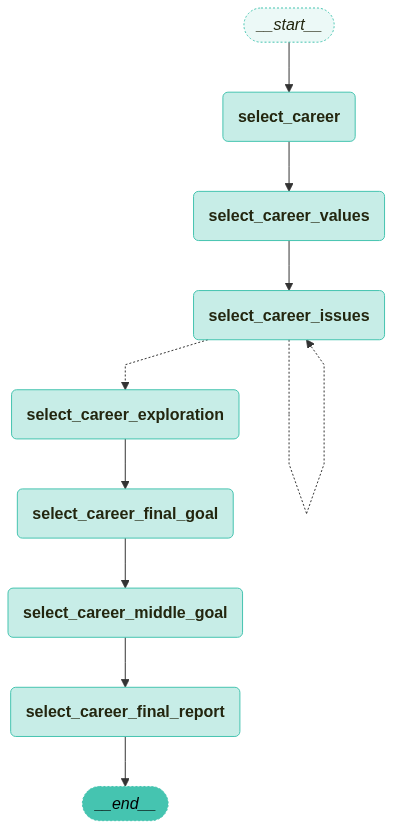

✅ 그래프 시각화 완료!


In [2]:
###### STEP 3. 그래프(Graph) 정의, 노드 추가 - 수정됨 ######
# 그래프 생성
graph_builder = StateGraph(CareerState)

# 노드 추가 - 이름 일치시킴
graph_builder.add_node("select_career", select_career)
graph_builder.add_node("select_career_values", select_career_values)  # ✅ 복수형으로 통일
graph_builder.add_node("select_career_issues", select_career_issues)
graph_builder.add_node("select_career_exploration", select_career_exploration)
graph_builder.add_node("select_career_final_goal", select_career_final_goal)
graph_builder.add_node("select_career_middle_goal", select_career_middle_goal)  # ✅ 오타 수정
graph_builder.add_node("select_career_final_report", select_career_final_report)

graph_builder.add_conditional_edges(
    source="select_career_issues",  # ✅ 노드 이름 일치
    path=route_tools,
    # route_tools 의 반환값이 "tools" 인 경우 "tools" 노드로, 그렇지 않으면 END 노드로 라우팅
    path_map={"select_career_issues": "select_career_issues", "select_career_exploration": "select_career_exploration"},
)
###### STEP 4. 그래프 엣지(Edge) 추가 - 수정됨 ######
# 시작 노드에서 직업 선택 노드로의 엣지 추가
graph_builder.add_edge(START, "select_career")  # ✅ 오타 수정

# 순차적 연결 - 모든 노드 이름 일치시킴
graph_builder.add_edge("select_career", "select_career_values")  # ✅ 수정
graph_builder.add_edge("select_career_values", "select_career_issues")  # ✅ 일치
#graph_builder.add_edge("select_career_issues", "select_career_exploration")  # ✅ 일치
graph_builder.add_edge("select_career_exploration", "select_career_final_goal")  # ✅ 일치
graph_builder.add_edge("select_career_final_goal", "select_career_middle_goal")  # ✅ 수정
graph_builder.add_edge("select_career_middle_goal", "select_career_final_report")  # ✅ 수정
graph_builder.add_edge("select_career_final_report", END)  # ✅ 일치

###### STEP 5. 그래프 컴파일(compile) ######
# 그래프 컴파일
graph = graph_builder.compile()
print("✅ 그래프가 성공적으로 컴파일되었습니다!")

###### STEP 6. 그래프 시각화 ######
# 그래프 시각화
try:
    visualize_graph(graph)
    print("✅ 그래프 시각화 완료!")
except Exception as e:
    print(f"⚠️ 시각화 오류: {e}")
    print("하지만 그래프는 정상적으로 작동합니다.")

In [ ]:
###### STEP 7. 그래프 실행 테스트 ######
def test_career_graph():
    """진로 탐구 그래프 실행 테스트"""
    print("=" * 60)
    print("🚀 진로 탐구 그래프 실행 시작")
    print("=" * 60)
    
    # 초기 상태 설정
    initial_state = {
        "step_state": "0",
        "career": "",
        "career_values": [],
        "career_issues": [],
        "career_exploration": "",
        "career_final_goal": "",
        "career_middle_goal": [],
        "career_final_report": "",
        "messages": ["진로 탐구를 시작합니다."]
    }
    
    try:
        # 그래프 실행
        result = graph.invoke(initial_state)
        
        print("\n" + "=" * 60)
        print("✅ 그래프 실행 완료")
        print("=" * 60)
        
        # 최종 결과 출력
        print("\n📊 최종 결과:")
        print(f"📍 단계: {result.get('step_state')}")
        print(f"💼 선택한 직업: {result.get('career')}")
        print(f"💎 직업 가치관: {result.get('career_values')}")
        print(f"⚠️ 직업 이슈: {result.get('career_issues')}")
        print(f"🔍 탐구 주제: {result.get('career_exploration')}")
        print(f"🎯 최종 목표: {result.get('career_final_goal')}")
        print(f"📋 중간 목표: {result.get('career_middle_goal')}")
        print(f"📝 최종 보고서: {result.get('career_final_report')}")
        
        print(f"\n💬 진행 메시지:")
        for i, msg in enumerate(result.get('messages', []), 1):
            print(f"  {i}. {msg}")
            
        return result
        
    except Exception as e:
        print(f"❌ 그래프 실행 중 오류 발생: {e}")
        print(f"오류 타입: {type(e).__name__}")
        import traceback
        traceback.print_exc()
        return None

# 그래프 실행
final_result = test_career_graph()